# Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [3]:
df = pd.read_csv(r"D:\ML\Data analysis projects\random projects\Roller Coaster Database  EDA\coaster_db.csv")

# Data Understanding

In [4]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [7]:
df.shape

(1087, 56)

In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

Observation
* There is a lot of none values
* we need to change the data type of some columns like speed column its type is object 

In [8]:
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inversions,932.0,1.547210,2.114073,0.0000,0.00000,0.0000,3.0000,14.0000
year_introduced,1087.0,1994.986201,23.475248,1884.0000,1989.00000,2000.0000,2010.0000,2022.0000
latitude,812.0,38.373484,15.516596,-48.2617,35.03105,40.2898,44.7996,63.2309
longitude,812.0,-41.595373,72.285227,-123.0357,-84.55220,-76.6536,2.7781,153.4265
speed1_value,937.0,53.850374,23.385518,5.0000,40.00000,50.0000,63.0000,240.0000
speed_mph,937.0,48.617289,16.678031,5.0000,37.30000,49.7000,58.0000,149.1000
height_value,965.0,89.575171,136.246444,4.0000,44.00000,79.0000,113.0000,3937.0000
height_ft,171.0,101.996491,67.329092,13.1000,51.80000,91.2000,131.2000,377.3000
Inversions_clean,1087.0,1.326587,2.030854,0.0000,0.00000,0.0000,2.0000,14.0000
Gforce_clean,362.0,3.824006,0.989998,0.8000,3.40000,4.0000,4.5000,12.0000


# Data Preperation

In [12]:
df = df[['coaster_name',
    'Location', 'Status',
    'Manufacturer',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
       'speed_mph', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [13]:
df.head(1)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9


In [14]:
# Rename our columns
df = df.rename(columns={
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [15]:
df.loc[df.duplicated()]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [17]:
df.loc[df.duplicated(subset=['coaster_name'])].head(5)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [18]:
df.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [20]:
df = df.loc[~df.duplicated(subset=['coaster_name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

# visulization

In [22]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [29]:
#list of columns that are categorical
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
#list of columns that are numerical
numerical_col = df.select_dtypes(include=['number']).columns.tolist()
categorical_col

['coaster_name',
 'Location',
 'Status',
 'Manufacturer',
 'Type_Main',
 'Opening_Date']

In [42]:
numerical_col

['year_introduced',
 'latitude',
 'longitude',
 'Speed_mph',
 'Height_ft',
 'Inversions',
 'Gforce']

In [56]:
def count_plot(col_1):
    plt.figure(figsize=(10,5))
    top_10_years = df[col_1].value_counts().nlargest(10).index
    sns.countplot(x=col_1, data=df[df[col_1].isin(top_10_years)], palette='husl')
    plt.show()
    print(col_1,"\n",df[col_1].value_counts())

### Top 10 Years Coasters Introduced

C:\Users\Youssif Allam\AppData\Local\Temp\ipykernel_10376\3421594410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_1, data=df[df[col_1].isin(top_10_years)], palette='husl')


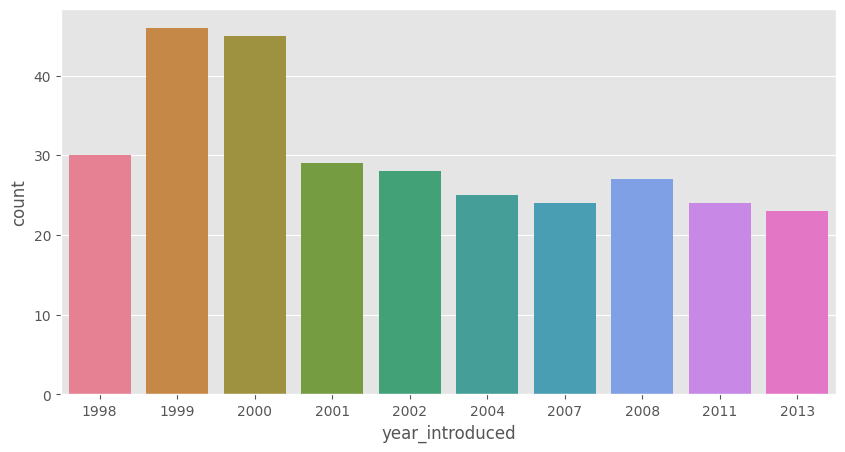

year_introduced 
 year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64


In [57]:
count_plot('year_introduced')

C:\Users\Youssif Allam\AppData\Local\Temp\ipykernel_10376\3421594410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_1, data=df[df[col_1].isin(top_10_years)], palette='husl')


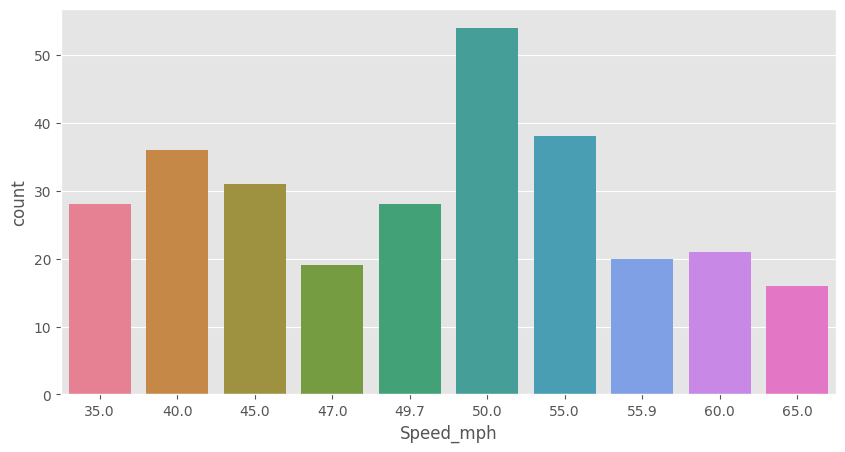

Speed_mph 
 Speed_mph
50.0    54
55.0    38
40.0    36
45.0    31
49.7    28
        ..
16.2     1
57.8     1
53.4     1
17.0     1
49.0     1
Name: count, Length: 176, dtype: int64


In [58]:
count_plot('Speed_mph')

C:\Users\Youssif Allam\AppData\Local\Temp\ipykernel_10376\4034609144.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = df , x = 'Speed_mph'  , palette='husl');


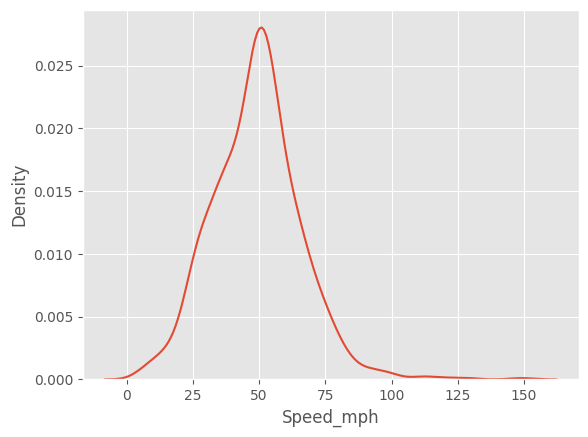

In [60]:
sns.kdeplot(data = df , x = 'Speed_mph'  , palette='husl');

# Feature Relationships

Text(0.5, 1.0, 'Coaster Speed vs. Height')

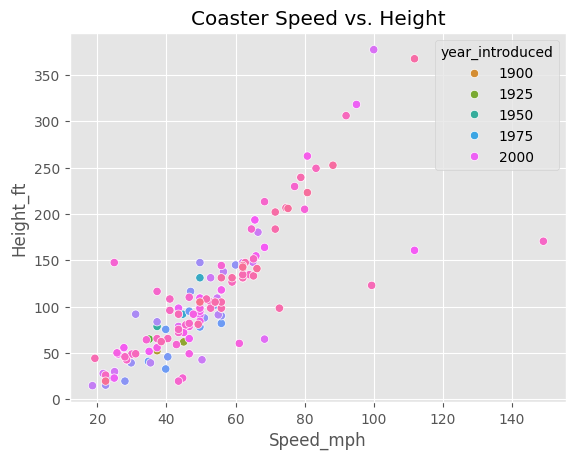

In [63]:
sns.scatterplot(data =df , x='Speed_mph' , y='Height_ft', hue='year_introduced',palette='husl').set_title('Coaster Speed vs. Height')

In [66]:
df .columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

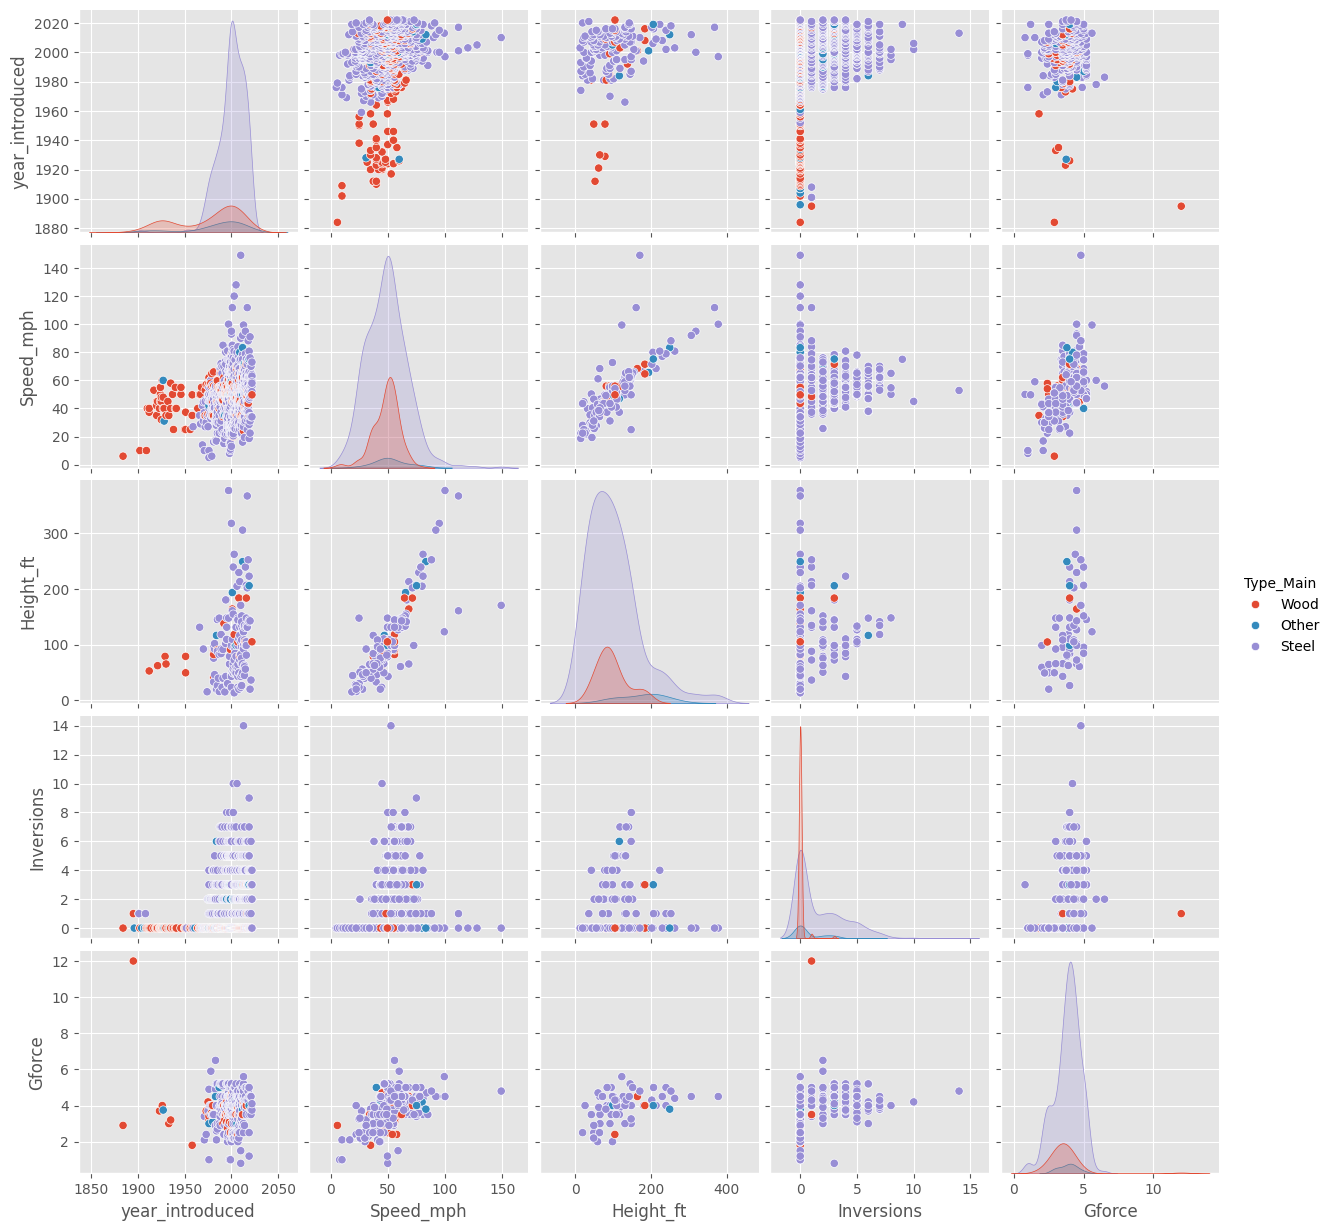

In [67]:
sns.pairplot(df,
             vars=['year_introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [69]:
df_corr = df[['year_introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,year_introduced,Speed_mph,Height_ft,Inversions,Gforce
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

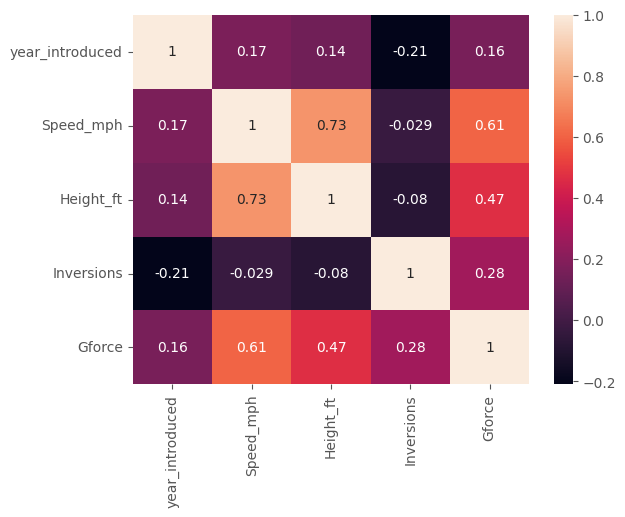

In [70]:
sns.heatmap(df_corr, annot=True)

# Question about the data

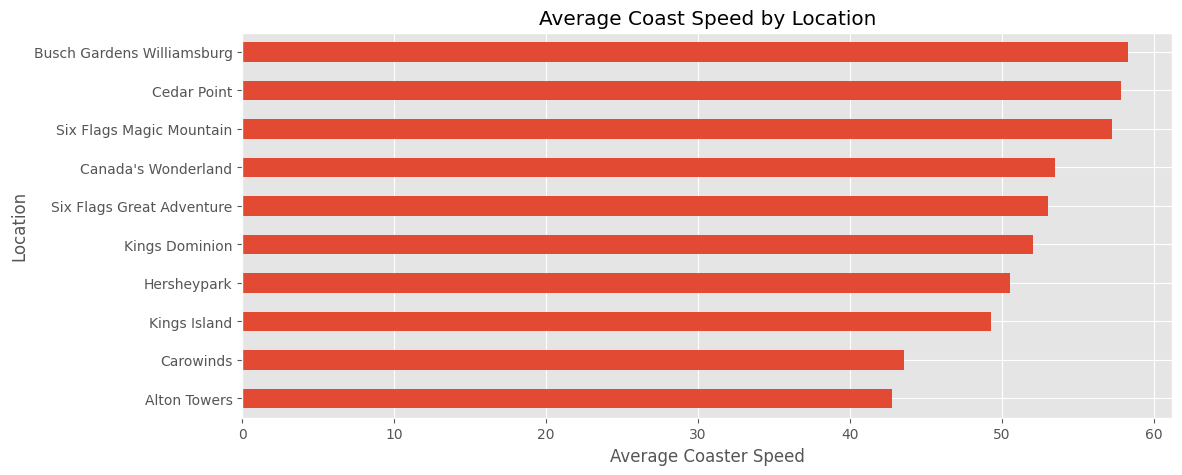

In [71]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()